In [1]:
import DMN3 as DMN
from matplotlib import pyplot as plt
import numpy as np
from helperfuncs import *

In [2]:
node = DMN.Node(np.ones(6)*2)
node.compliance
node.rotated_compliance = node.compliance
p1 = np.array([0.7243458035427647,-0.6624489424587073,0.0,0.7243458035427647,0.0,2.7735894920029462])
p2 = np.array([0.36757546481294456,-0.16233746963686535,0.0,0.3675754648129446,0.0,1.05982586889962])

node.left = DMN.Node(p1)
node.right = DMN.Node(p2)

node.right.rotated_compliance = node.right.compliance
node.left.rotated_compliance = node.left.compliance

node.rotated_compliance = homogenise(node.left.rotated_compliance, node.right.rotated_compliance,0.2,0.8)

In [3]:
node.delta_sigma = np.ones(3)*2
DMN.update_stress(node)



In [4]:
node.right.delta_sigma

array([2.21854509, 2.        , 2.        ])

In [5]:
node.left.delta_sigma

array([1.12581965, 2.        , 2.        ])

In [6]:
DMN.calc_elasto_plastic_operator(node),convert_vectorised(node.rotated_compliance)

(array([[ 0.40774137, -0.218641  ,  0.        ],
        [-0.218641  ,  0.3776457 ,  0.        ],
        [ 0.        ,  0.        ,  1.40257859]]),
 array([[ 0.40774137, -0.218641  ,  0.        ],
        [-0.218641  ,  0.3776457 ,  0.        ],
        [ 0.        ,  0.        ,  1.40257859]]))

In [7]:
res1 = np.ones((3,))* 2
res2 = np.ones((3,))  * 4

In [8]:
homogenise_res(node.left.rotated_compliance,node.right.rotated_compliance,0.5,0.5,res1,res2)

array([3.32673632, 2.54198944, 3.        ])

In [9]:
Model = DMN.Tree(3)
root = Model.initialise()

Model.propagate_weights(root)
Model.initialise_bottom_layer(root,p1,p2)


In [10]:
Model.homogenise_system_res(root)


In [11]:
root.res_strain,root.delta_eps

(array([0.13130115, 0.41907698, 0.127005  ]), array([0., 0., 0.]))

In [12]:
root.sigma = np.array([1,2,3])
Model.backwards_pass(root)

Max error in backwards pass is:  1.0726833887676033


False

In [13]:
bottom_node = Model.fetch_node(root,3,6)

In [14]:
bottom_node.delta_sigma,bottom_node.delta_eps


DMN.return_mapping(root)

In [15]:
from DMN3 import xi,evaluate_plastic_state

# def xi(node,delta_gamma):
#     D = convert_vectorised(node.rotated_compliance)
#     A = np.linalg.inv(D + delta_gamma *P)@ D
#     sigma = node.sigma
    
#     return sigma.T @A.T@P@A@sigma
    
def xi_prime_finite_diff(node,delta_gamma,delta=1e-6,sigma_trial=np.zeros((3,))):
   
    return (xi(node,delta_gamma + delta,sigma_trial) - xi(node,delta_gamma - delta,sigma_trial))/(2*delta)

def xi_prime_ana(node,delta_gamma,sigma_trial=np.zeros((3,))):
    D = convert_vectorised(node.rotated_compliance)
    C = np.linalg.inv(D)
    A = np.linalg.inv(D + delta_gamma *P)@ D
    
    middle_mat = P.T @C.T@ A.T + P@A@C


    return -sigma_trial.T@A.T@middle_mat@P@A@sigma_trial


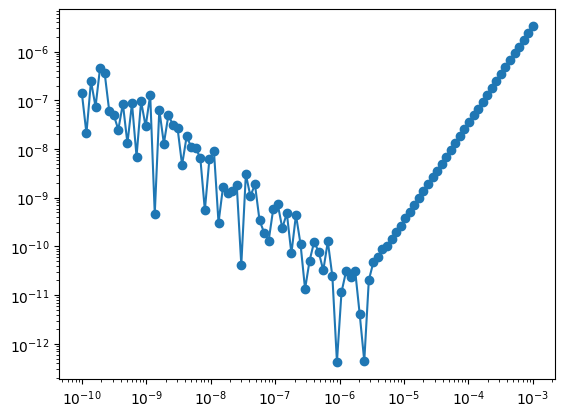

In [16]:
import timeit

gamma = .23123
deltas = np.logspace(-10,-3,100)
res = np.zeros_like(deltas)


sigma_trial = np.array([1,2,3])
for index,delta in enumerate(deltas):
    res[index] = abs(xi_prime_finite_diff(root,gamma,delta,sigma_trial)-xi_prime_ana(root,gamma,sigma_trial))/abs(xi_prime_ana(root,gamma,sigma_trial))

plt.plot(deltas,res,marker='o',label='Finite Difference')
plt.xscale('log')
plt.yscale('log')


# t1 = timeit.timeit(lambda: xi_prime_finite_diff(root,gamma,1e-6))
# t2 = timeit.timeit(lambda: xi_prime_ana(root,gamma))


In [17]:
# t1, t2

In [18]:
D = convert_vectorised(node.rotated_compliance)
delta_gamma= evaluate_plastic_state(root,np.array([0,0,0.3]))
A = np.linalg.inv(D + delta_gamma *P)@ D
A@np.array([0,0,0.3])

xi and sigma_y 0.18 0.010000000000000002


array([0.      , 0.      , 0.197602])

In [19]:
delta_gamma

np.float64(0.3634104183867743)

In [20]:
loading_path = np.linspace(0,0.005,100)
Model = DMN.Tree(3)

metadata,training_error,validation_error,root = DMN.load_model('models/model_N=3.pkl')

# root = Model.initialise(num_loading_steps=len(loading_path))

Model.propagate_weights(root)
Model.initialise_bottom_layer(root,p1,p2)
# print(loading_path)

Model.plasticity_loader(root,loading_path)


Delta sigma: [3.26429636e-04 3.11165613e-04 2.99164321e-05]
Max error in backwards pass is:  0.00043414525847448583
Delta sigma: [-5.64595461e-05  1.18589782e-04 -5.05811470e-04]
Max error in backwards pass is:  0.0031930553583731413
Delta sigma: [ 0.00150611 -0.00030481  0.00389421]
Max error in backwards pass is:  0.031089463176237828
xi and sigma_y 0.008685422004788146 0.010000000000000002
Delta sigma: [-0.00668393  0.00344464 -0.02058031]
Max error in backwards pass is:  0.2413740255303393
xi and sigma_y 0.40206509587200034 0.010000000000000002
xi and sigma_y 0.7212433599287887 0.012444478506490516
xi and sigma_y 0.05841524364167461 0.010000000000000002
xi and sigma_y 0.05067079553114811 0.010000000000000002
Delta sigma: [ 0.02172794 -0.01785032  0.08400928]
Max error in backwards pass is:  1.9067071260892963
xi and sigma_y 37.71254253934779 0.19253136055061312
xi and sigma_y 106.7155762824168 0.3746256027266959
xi and sigma_y 0.010680926019066178 0.010000000000000002
xi and sigma_

ValueError: Plastic state not converged after 5000 iterations

In [ ]:
root.sigmas

plt.plot(root.epss[:,0],root.sigmas[:,2],label='sigma_1',marker = 'x')

In [ ]:
bottom_node = Model.fetch_node(root,3,6)

bottom_node.eff_plas_strain